# Image processing in Python

In [53]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage

In [17]:
img = plt.imread('data/image01.png')

In [18]:
type(img)

numpy.ndarray

In [19]:
img.shape

(3264, 1836, 3)

(-0.5, 1835.5, 3263.5, -0.5)

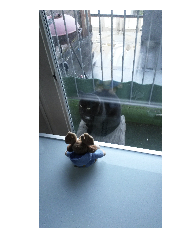

In [26]:
plt.imshow(img)
plt.axis('off')

(-0.5, 1835.5, 3263.5, -0.5)

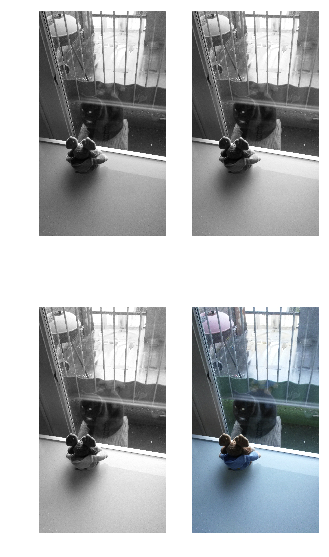

In [29]:
plt.figure(figsize=(5,10))

plt.subplot(2,2,1)
plt.imshow(img[:,:,0], cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(img[:,:,1], cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(img[:,:,2], cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(img)
plt.axis('off')

# Image transformation

In [33]:
img.shape

(3264, 1836, 3)

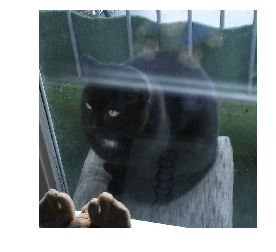

In [38]:
img_small = img[1000:2000,400:1400,:]
plt.imshow(img_small)
plt.axis('off');

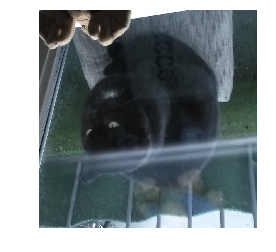

In [43]:
img_mirror = img_small[::-1,::,:]
plt.imshow(img_mirror)
plt.axis('off');

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


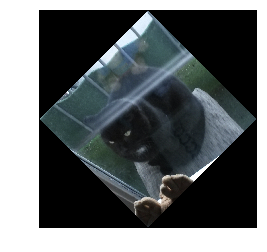

In [39]:
img_45 = ndimage.rotate(img_small, 45)
plt.imshow(img_45)
plt.axis('off');

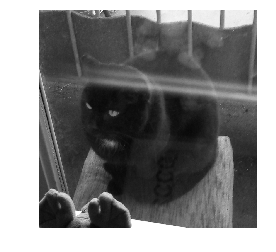

In [57]:
img_gray = np.dot(img_small[...,:3], [0.299, 0.587, 0.114])

plt.imshow(img_gray, cmap=plt.cm.gray)
plt.axis('off');

# Statistical information

In [62]:
img_gray.min(), img_gray.mean(), img_gray.max()

(0.014066667306236923, 0.30702334131917997, 0.9999999999999999)

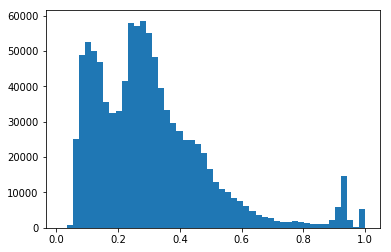

In [61]:
plt.hist(img_gray.flatten(), bins=50);

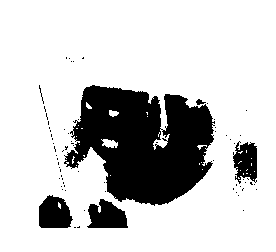

In [82]:
img_thresh = np.where(img_gray > 0.2, 1, 0)

plt.imshow(img_thresh, cmap=plt.cm.gray)
plt.axis('off');

# Image operations

In [138]:
np.random.seed(1)
n = 10
l = 256
im = np.zeros((l, l))
points = l*np.random.random((2, n**2))
im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
im = ndimage.gaussian_filter(im, sigma=l/(4.*n))

mask = (im > im.mean()).astype(np.float)

mask += 0.1 * im

img = mask + 0.2*np.random.randn(*mask.shape)
plt.imsave('data/image02.png', img)

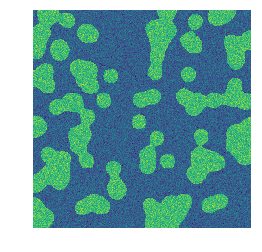

In [143]:
img2 = plt.imread('data/image02.png')

plt.imshow(img2, cmap=plt.cm.gray)
plt.axis('off');

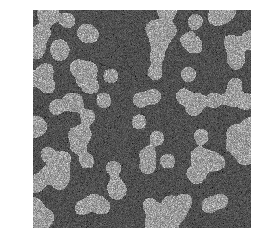

In [144]:
img2_gray = np.dot(img2[...,:3], [0.299, 0.587, 0.114])
plt.imshow(img2_gray, cmap=plt.cm.gray)
plt.axis('off');

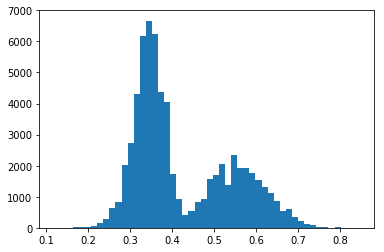

In [145]:
plt.hist(img2_gray.flatten(), bins=50);

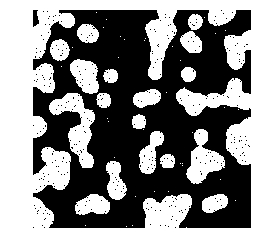

In [148]:
img_thresh = np.where(img2_gray > 0.45, 1, 0)

plt.imshow(img_thresh, cmap=plt.cm.gray)
plt.axis('off');

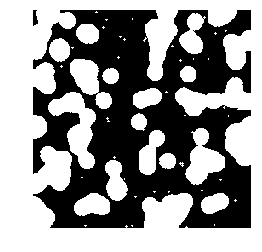

In [159]:
img_out = ndimage.binary_dilation(img_thresh)
# img_out = ndimage.binary_closing(img_thresh)
# img_out = ndimage.binary_opening(img_thresh)
# img_out = ndimage.binary_erosion(img_thresh)


plt.imshow(img_out, cmap=plt.cm.gray)
plt.axis('off');

# Edge detection

In [103]:
im = np.zeros((256, 256))
im[64:-64, 64:-64] = 1

im = ndimage.rotate(im, 15, mode='constant')
im = ndimage.gaussian_filter(im, 8)

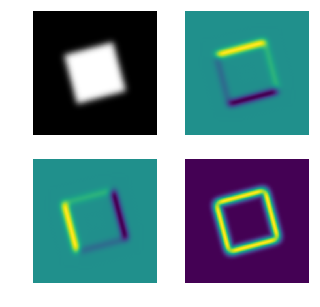

In [107]:
sx = ndimage.sobel(im, axis=0, mode='constant')
sy = ndimage.sobel(im, axis=1, mode='constant')

sob = np.hypot(sx, sy)

plt.figure(figsize=(5, 5))

plt.subplot(2,2,1)
plt.imshow(im, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(sx)
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(sy)
plt.axis('off');

plt.subplot(2,2,4)
plt.imshow(sob)
plt.axis('off');


Based on: https://www.scipy-lectures.org/advanced/image_processing/index.html